# Week 34: Introduction to the course, Logistics and Practicalities
**Eric Ludvigsen**, Student

Date: **Week 34, August 19-23, 2024**

## Exercises

Here are three possible exercises for week 34

## Exercise 1: Setting up various Python environments

The first exercise here is of a mere technical art. We want you to have 
* git as a version control software and to establish a user account on a provider like GitHub. Other providers like GitLab etc are equally fine. You can also use the University of Oslo [GitHub facilities](https://www.uio.no/tjenester/it/maskin/filer/versjonskontroll/github.html). 

* Install various Python packages

We will make extensive use of Python as programming language and its
myriad of available libraries.  You will find
IPython/Jupyter notebooks invaluable in your work.  You can run **R**
codes in the Jupyter/IPython notebooks, with the immediate benefit of
visualizing your data. You can also use compiled languages like C++,
Rust, Fortran etc if you prefer. The focus in these lectures will be
on Python.

If you have Python installed (we recommend Python3) and you feel
pretty familiar with installing different packages, we recommend that
you install the following Python packages via **pip** as 

1. pip install numpy scipy matplotlib ipython scikit-learn sympy pandas pillow 

For **Tensorflow**, we recommend following the instructions in the text of 
[Aurelien Geron, Hands‑On Machine Learning with Scikit‑Learn and TensorFlow, O'Reilly](http://shop.oreilly.com/product/0636920052289.do)

We will come back to **tensorflow** later. 

For Python3, replace **pip** with **pip3**.

For OSX users we recommend, after having installed Xcode, to
install **brew**. Brew allows for a seamless installation of additional
software via for example 

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution,
you can use **pip** as well and simply install Python as 

1. sudo apt-get install python3  (or python for Python2.7)

If you don't want to perform these operations separately and venture
into the hassle of exploring how to set up dependencies and paths, we
recommend two widely used distrubutions which set up all relevant
dependencies for Python, namely 

* [Anaconda](https://docs.anaconda.com/), 

which is an open source
distribution of the Python and R programming languages for large-scale
data processing, predictive analytics, and scientific computing, that
aims to simplify package management and deployment. Package versions
are managed by the package management system **conda**. 

* [Enthought canopy](https://www.enthought.com/product/canopy/) 

is a Python
distribution for scientific and analytic computing distribution and
analysis environment, available for free and under a commercial
license.

We recommend using **Anaconda** if you are not too familiar with setting paths in a terminal environment.

In [452]:
# enviornment is set up hence these packages working
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in [0,1]$ and defined by random numbers computed with the uniform distribution. The function $y$ is a quadratic polynomial in $x$ with added stochastic noise according to the normal distribution $\cal {N}(0,1)$.
The following simple Python instructions define our $x$ and $y$ values (with 100 data points).

In [453]:
n = 100
randomness_coeff = 0.2
x = np.random.rand(n,1)
y = 2.0 + 5*(x*x) + randomness_coeff * np.random.randn(n,1)

# fancier display than numpy print
results_frame = pd.DataFrame({"x":x.flatten(), "y":y.flatten()})
display(results_frame)

,x,y
0,0.823319,4.823722
1,0.192135,2.223278
2,0.793147,5.505977
3,0.476461,2.876920
4,0.930851,5.922537
...,...,...
95,0.495714,3.293497
96,0.943111,6.507975
97,0.300870,2.572539
98,0.757091,4.824440


1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 



In [454]:
# make design matrix
P = 3
# matrix should correspond to pattern
# beta_1 + beta_2*x + beta_3*x^2
feature_matrix = np.zeros((n, P))

#feature_matrix[:,0] = 1
#feature_matrix[:,1] = x[:,0]
#feature_matrix[:,2] = x[:,0]**2
#feature_matrix[:,3] = x[:,0]**3

# automated way of filling matrix
for exponent in range(0,P):
    feature_matrix[:,exponent] = x[:,0]**exponent

print("feature matrix")
df = pd.DataFrame(feature_matrix)
display(df)


feature matrix


,0,1,2
0,1.0,0.823319,0.677854
1,1.0,0.192135,0.036916
2,1.0,0.793147,0.629082
3,1.0,0.476461,0.227015
4,1.0,0.930851,0.866483
...,...,...,...
95,1.0,0.495714,0.245733
96,1.0,0.943111,0.889458
97,1.0,0.300870,0.090523
98,1.0,0.757091,0.573186


In [455]:
# optimal beta is now given by
# beta_hat = (X^T X)^-1 X^T y
feature_transposed = np.transpose(feature_matrix)
print("feature matrix shape: ", feature_matrix.shape)
print("transposed:", feature_transposed.shape)

x_t_x = np.matmul(feature_transposed, feature_matrix)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(feature_transposed).dot(y)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = feature_matrix @ beta
df = pd.DataFrame(y_tilde)
print("y tilde")
display(df)

print("add modelled y to display frame along with absolute error")
results_frame["y_tilde"] = y_tilde.flatten()
results_frame["y - y_tilde"] = y.flatten()-y_tilde.flatten()
display(results_frame)

feature matrix shape:  (100, 3)
transposed: (3, 100)
X^T X shape: (3, 3)

beta


,0
0,2.004780
1,0.001430
2,4.923945


y tilde


,0
0,5.343674
1,2.186826
2,5.103481
3,3.123272
4,6.272629
...,...
95,3.215464
96,6.385770
97,2.450940
98,4.828200


add modelled y to display frame along with absolute error


,x,y,y_tilde,y - y_tilde
0,0.823319,4.823722,5.343674,-0.519952
1,0.192135,2.223278,2.186826,0.036452
2,0.793147,5.505977,5.103481,0.402496
3,0.476461,2.876920,3.123272,-0.246353
4,0.930851,5.922537,6.272629,-0.350091
...,...,...,...,...
95,0.495714,3.293497,3.215464,0.078033
96,0.943111,6.507975,6.385770,0.122205
97,0.300870,2.572539,2.450940,0.121598
98,0.757091,4.824440,4.828200,-0.003761


2. Use thereafter **scikit-learn** (see again the examples in the regression slides) and compare with your own code.   


In [456]:
# if this cell runs twice in a row (without running the above prediction),
# the results are wrong and y_tilde_skl changes - not sure why
clf = skl.LinearRegression().fit(feature_matrix, y)
ytilde_skl = clf.predict(feature_matrix)

In [457]:
results_frame["scikit y_tilde"] = ytilde_skl
display(results_frame)
# similar y_tilde result

,x,y,y_tilde,y - y_tilde,scikit y_tilde
0,0.823319,4.823722,5.343674,-0.519952,5.343674
1,0.192135,2.223278,2.186826,0.036452,2.186826
2,0.793147,5.505977,5.103481,0.402496,5.103481
3,0.476461,2.876920,3.123272,-0.246353,3.123272
4,0.930851,5.922537,6.272629,-0.350091,6.272629
...,...,...,...,...,...
95,0.495714,3.293497,3.215464,0.078033,3.215464
96,0.943111,6.507975,6.385770,0.122205,6.385770
97,0.300870,2.572539,2.450940,0.121598,2.450940
98,0.757091,4.824440,4.828200,-0.003761,4.828200



3. Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

In [458]:
def custom_mse(y_true, y_pred):
    n = len(y_true) # number of data points
    mse = (1/n) * np.sum( (y_true - y_pred)**2 )
    return mse 


In [459]:

calculated_mse = custom_mse(y, y_tilde)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

# scikit mean squared error
mse_skl = mean_squared_error(y, ytilde_skl)                          
print(f"Scikit mean squared error:     {mse_skl:.2f}")

Calculated mean squared error: 0.05
Scikit mean squared error:     0.05


and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

In [460]:
def custom_r2(y_true, y_pred):
    n = len(y_true) # number of data points
    y_mean = (1/n) * np.sum(y_true)
    r2 =  1 - ((np.sum( (y_true - y_pred)**2) ) / (np.sum( (y_true - y_mean)**2 )))
    return r2


In [461]:

calculated_r2 = custom_r2(y, y_tilde)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

# scikit r^2 score
mse_r2 = r2_score(y, ytilde_skl)                          
print(f"Scikit R^2:     {mse_r2:.2f}")

Calculated R^2: 0.98
Scikit R^2:     0.98


You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

In [462]:
# scikit predictions match manually created predictions
# with low stochastic noise, the match is almost perfect.
# fitting a second order polynomial with a second order polynomial should match well so that is as expected

# increasing noise gradually makes the results diverge, it is no longer sufficient to match a simple polynomial
# coefficient = 20 gives mse 358.28 and R^2 0.01 which is terrible
# changing polynomial degree of model (P) does not help in either case

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [463]:
np.random.seed()
n = 100 + np.random.randint(0, 100) # vary data points by random extra
# make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x input data, x train, x test")
print(x.shape)
print(x_train.shape)
print(x_test.shape)

print("y data, y train, y test")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

# fancier display than numpy print
results_frame_train = pd.DataFrame({"x_train":x_train.flatten(), "y_train":y_train.flatten()})
results_frame_test = pd.DataFrame({"x_test":x_test.flatten(), "y_test":y_test.flatten()})
display(results_frame_test)

x input data, x train, x test
(141, 1)
(112, 1)
(29, 1)
y data, y train, y test
(141, 1)
(112, 1)
(29, 1)


,x_test,y_test
0,-1.542857,0.114331
1,-0.685714,0.712772
2,0.000000,1.107522
3,1.371429,1.160932
4,0.685714,0.828471
5,0.600000,1.120232
6,1.500000,1.291765
7,1.671429,1.408068
8,-2.614286,0.127528
9,2.057143,1.592712


where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [464]:
# make design matrix
P = 5

X_train = np.zeros((len(x_train), P))
X_test = np.zeros((len(x_test), P))
for exponent in range(0,P):
    X_train[:,exponent] = x_train[:,0]**exponent
    X_test[:,exponent] = x_test[:,0]**exponent

print("feature matrix for training data")
df = pd.DataFrame(X_train)
display(df)

print("feature matrix for test data")
df = pd.DataFrame(X_test)
display(df)


feature matrix for training data


,0,1,2,3,4
0,1.0,-2.014286,4.057347,-8.172656,16.462064
1,1.0,2.571429,6.612245,17.002915,43.721783
2,1.0,-1.371429,1.880816,-2.579405,3.537470
3,1.0,1.885714,3.555918,6.705446,12.644555
4,1.0,0.728571,0.530816,0.386738,0.281766
...,...,...,...,...,...
107,1.0,-2.700000,7.290000,-19.683000,53.144100
108,1.0,-2.657143,7.060408,-18.760513,49.849363
109,1.0,-1.757143,3.087551,-5.425268,9.532971
110,1.0,-2.871429,8.245102,-23.675222,67.981708


feature matrix for test data


,0,1,2,3,4
0,1.0,-1.542857,2.380408,-3.672630,5.666343
1,1.0,-0.685714,0.470204,-0.322426,0.221092
2,1.0,0.000000,0.000000,0.000000,0.000000
3,1.0,1.371429,1.880816,2.579405,3.537470
4,1.0,0.685714,0.470204,0.322426,0.221092
5,1.0,0.600000,0.360000,0.216000,0.129600
6,1.0,1.500000,2.250000,3.375000,5.062500
7,1.0,1.671429,2.793673,4.669426,7.804611
8,1.0,-2.614286,6.834490,-17.867309,46.710251
9,1.0,2.057143,4.231837,8.705493,17.908442


**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

In [465]:
# optimal beta is given by
# beta_hat = (X^T X)^-1 X^T y

x_t_x = np.matmul(X_train.T, X_train)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(X_train.T).dot(y_train)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = X_train @ beta

print("add modelled y to display frame along with absolute error")
results_frame_train["y_tilde"] = y_tilde.flatten()
results_frame_train["y_train - y_tilde"] = y_train.flatten()-y_tilde.flatten()
display(results_frame_train)

# prediction
y_pred = X_test @ beta

print("predicted y compared with test y and their error")
results_frame_test["y_predict"] = y_pred.flatten()
results_frame_test["y_test - y_predict"] = y_test.flatten()-y_pred.flatten()
display(results_frame_test)

calculated_mse = custom_mse(y_test, y_pred)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

calculated_r2 = custom_r2(y_test, y_pred)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

X^T X shape: (5, 5)

beta


,0
0,0.855720
1,0.466827
2,-0.035719
3,-0.039071
4,-0.002552


add modelled y to display frame along with absolute error


,x_train,y_train,y_tilde,y_train - y_tilde
0,-2.014286,0.017576,0.047768,-0.030191
1,2.571429,1.122265,1.044031,0.078234
2,-1.371429,0.071776,0.240070,-0.168294
3,1.885714,1.408254,1.314745,0.093509
4,0.728571,0.710145,1.161047,-0.450902
...,...,...,...,...
107,-2.700000,-0.049647,-0.031720,-0.017928
108,-2.657143,-0.094354,-0.031145,-0.063209
109,-1.757143,-0.012387,0.112792,-0.125179
110,-2.871429,-0.032090,-0.027755,-0.004335


predicted y compared with test y and their error


,x_test,y_test,y_predict,y_test - y_predict
0,-1.542857,0.114331,0.179477,-0.065147
1,-0.685714,0.712772,0.530849,0.181923
2,0.000000,1.107522,0.855720,0.251801
3,1.371429,1.160932,1.318950,-0.158018
4,0.685714,0.828471,1.145873,-0.317403
5,0.600000,1.120232,1.114188,0.006044
6,1.500000,1.291765,1.330807,-0.039041
7,1.671429,1.408068,1.333841,0.074228
8,-2.614286,0.127528,-0.029954,0.157482
9,2.057143,1.592712,1.279050,0.313661


Calculated mean squared error: 0.05
Calculated R^2: 0.82


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [466]:
def make_feature_matrix(x, P):
    X = np.zeros((len(x), P))
    for exponent in range(0,P):
        X[:,exponent] = x[:,0]**exponent

    return X

def linear_regression_model(X, y):
    beta = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

    return beta

def linear_prediction(X, beta):
    y_tilde = X @ beta

    return y_tilde                
    


In [467]:
# input data
np.random.seed()

n = 100 + np.random.randint(0, 1000)
print(f"number of data points: {n}")

x_full = np.linspace(-3, 3, n).reshape(-1, 1)
y_full = np.exp(-x_full**2) + 1.5 * np.exp(-(x_full-2)**2)+ np.random.normal(0, 0.1, x_full.shape)

P = 16
P = 27
features_list = list(range(1, P))
print(features_list)

train_mses_list = []
train_r2_list = []
test_mses_list = []
test_r2_list = []
for features in features_list:
    calc_feature_matrix = make_feature_matrix(x_full, features)

    X_train, X_test, y_train, y_test = train_test_split(calc_feature_matrix, y_full, test_size=0.2)

    calc_beta = linear_regression_model(X_train, y_train)
    y_tilde = linear_prediction(X_train, calc_beta)
    y_prediction = linear_prediction(X_test, calc_beta)

    #results_frame_test = pd.DataFrame({"x_test":x_full[len(y_train):].flatten(), "y_test":y_test.flatten()})
    #results_frame_test["y_prediction"] = y_prediction.flatten()

    #display(results_frame_test)

    train_calculated_mse = custom_mse(y_train, y_tilde)
    train_mses_list.append(train_calculated_mse)
    train_calculated_r2 = custom_r2(y_train, y_tilde)
    train_r2_list.append(train_calculated_r2)

    #print(f"Train data mean squared error: {train_calculated_mse:.3f}")
    #print(f"Train data R^2: {train_calculated_r2:.3f}")

    #print()

    test_calculated_mse = custom_mse(y_test, y_prediction)
    test_mses_list.append(test_calculated_mse)
    test_calculated_r2 = custom_r2(y_test, y_prediction)
    test_r2_list.append(test_calculated_mse)

    #print(f"Test data mean squared error: {test_calculated_mse:.3f}")
    #print(f"Test data R^2: {test_calculated_r2:.3f}")

number of data points: 777
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


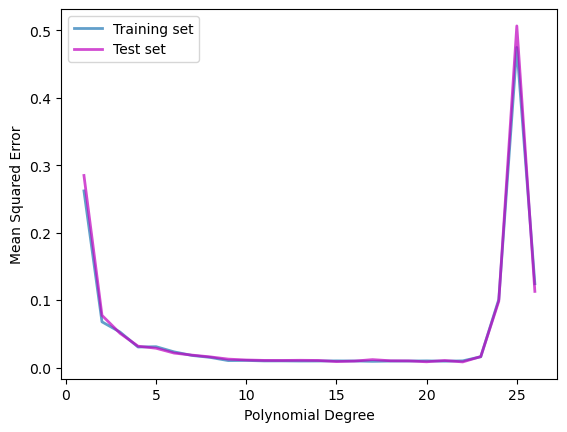

In [468]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'Mean Squared Error')
ax.plot(features_list, train_mses_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_mses_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
plt.show()